# Beacon

In [1]:
%load_ext autoreload
%autoreload 2
# %autoreload? for help
import cv2
import numpy as np
import math
#import picamera
import io
from IPython.display import Image
import time
import glob
from termcolor import colored
import math
import re
import cv2
import numpy as np
from matplotlib import pyplot as plt
from beacon_fct import * 

In [2]:
boundariesyb = [
     ([0, 0, 215], [255, 153, 255], 'r', (0,0,255), (0,8000)),
     ([0, 200, 97], [255, 255, 255], 'y', (0,255,255), (0,0)),
     ([230, 141, 0], [255, 244, 255], 'b', (255,0,0), (8000,0))
]

In [3]:
boundaries = [
         ([0, 0, 180], [255, 153, 255], 'r', (0,0,255), (0,8000)),
         ([230, 141, 0], [255, 225, 255], 'b', (255,0,0), (8000,0)),
         ([0, 200, 97], [255, 255, 255], 'y', (0,255,255), (0,0)),
         ([77, 235, 0], [220, 244, 255], 'g', (0,255,0), (8000,8000))
    ]

# Fonction to find the perfect center of the image

In [5]:
findCenter(500,600,300,400,41.63,131.186,132.81,boundariesyb,center)

KeyboardInterrupt: 

# HSV Filtering

In [10]:
findThreshold()

KeyboardInterrupt: 

# Process the image, find angles and get robot's position and orientation

In [40]:
center_circles = (532, 357)
center_beacon = (547,355)

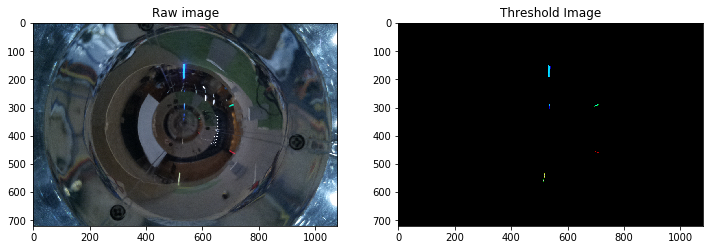

In [46]:
rawImage = cv2.imread('images/beacon_4000_500_270.png')    
height,width,depth = rawImage.shape
imgWithCircle  = np.zeros((height,width), np.uint8)
cv2.circle(imgWithCircle,center_circles,207,(255,255,255),thickness=-1)
cv2.circle(imgWithCircle,center_circles,165,(0,0,0),thickness=-1)
cv2.circle(imgWithCircle,center_circles,75,(255,255,255),thickness=-1)
cv2.circle(imgWithCircle,center_circles,45,(0,0,0),thickness=-1)
imask = imgWithCircle>0
img = np.zeros_like(rawImage, np.uint8)
img[imask] = rawImage[imask]

ret,thresh_img = cv2.threshold(img,170,0,cv2.THRESH_TOZERO)
#thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('threshold_img.png',thresh_img)

rawImage = cv2.cvtColor(rawImage, cv2.COLOR_BGR2RGB)
thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)

show_images([rawImage,thresh_img], cols = 1, titles = ["Raw image", "Threshold Image"])

time:  0.11500906944274902
[-149.20393795351401, 86.67259575827343, -80.48205083905125, 154.85521436932106]


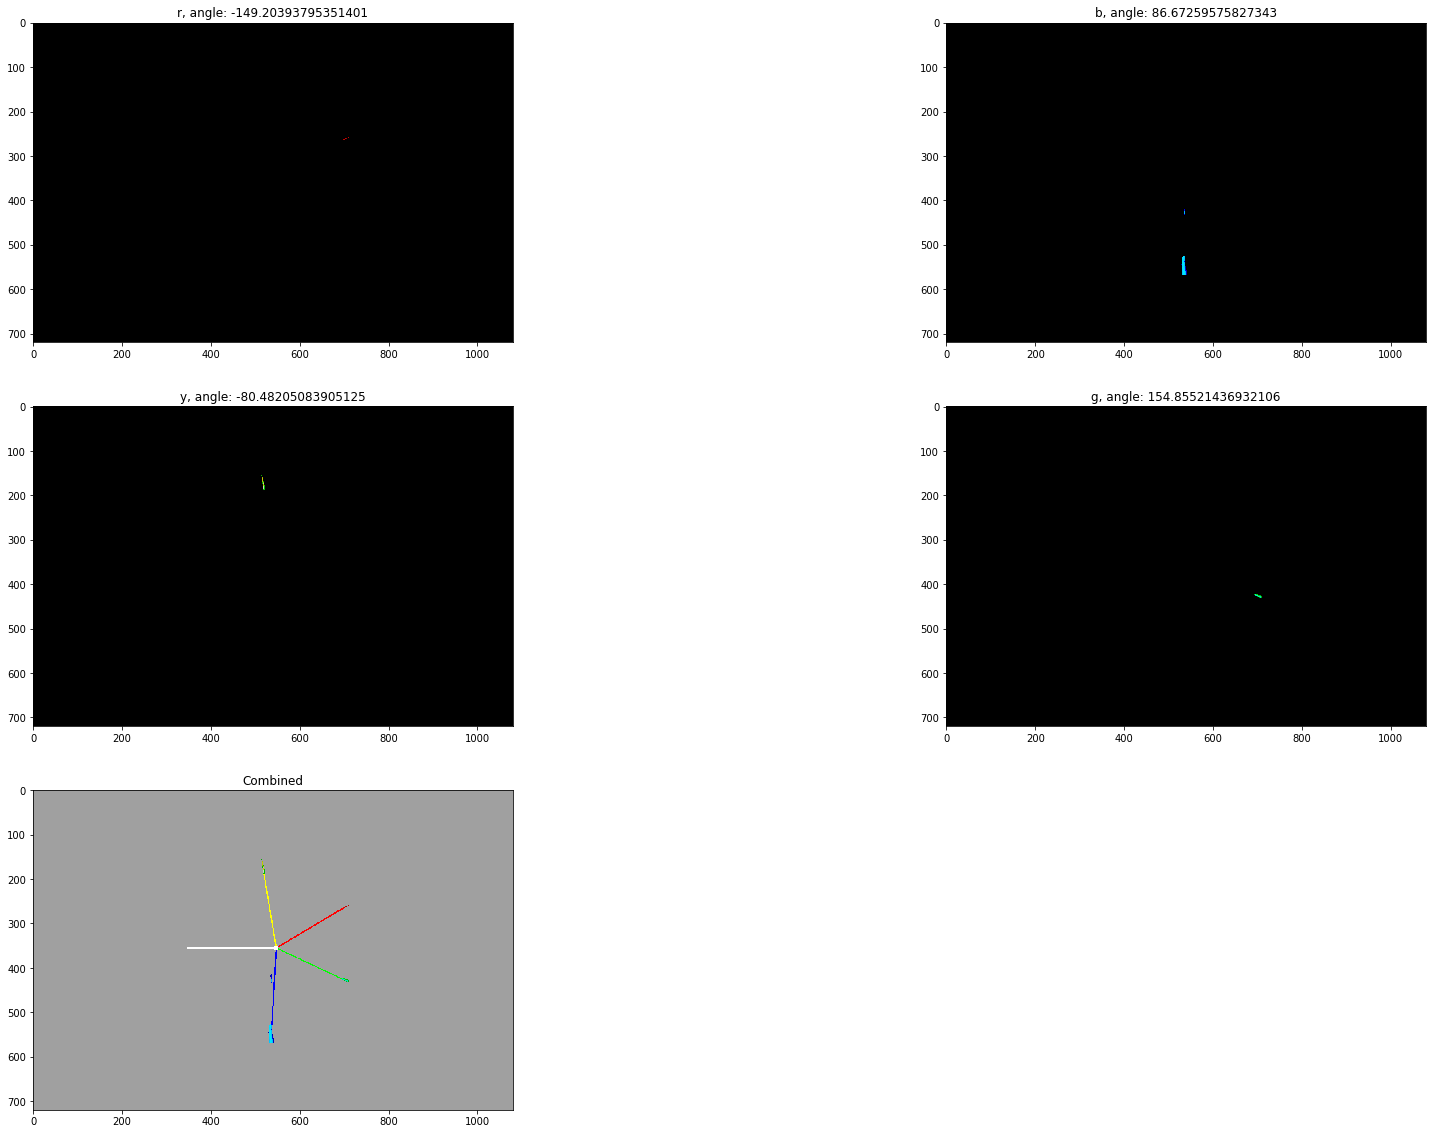

In [47]:
threshImg = cv2.imread('threshold_img.png') 
angles,lights_coordinates = find_angles_with_display(threshImg,center_beacon,boundaries)

In [48]:
print("Robot's position and orientation: ", find_robot_pos(angles,lights_coordinates))

Robot's position and orientation:  (3970.255447570097, 450.4529481579436, -93.0507556334357)


# Test Process on several images

In [61]:
center_circles = (532, 357)
center_beacon = (547,355)
i = 0
images_ = []
titles_ = []
for filename in glob.glob("./images/*.png"):
    start = time.time()
    elements = re.findall('[+-]?\d+', filename)
    try: 
        x,y,a = elements[0],elements[1],elements[2]
        x,y,a = float(x),float(y),float(a)
    except:
        continue
    i = i + 1
    print("-- Picture: ", filename[2:-4], '--')
   
    rawImage = cv2.imread(filename)    
    height,width,depth = rawImage.shape
    imgWithCircle  = np.zeros((height,width), np.uint8)
    cv2.circle(imgWithCircle,center_circles,207,(255,255,255),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,165,(0,0,0),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,75,(255,255,255),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,45,(0,0,0),thickness=-1)
    imask = imgWithCircle>0
    img = np.zeros_like(rawImage, np.uint8)
    img[imask] = rawImage[imask]

    ret,thresh_img = cv2.threshold(img,170,0,cv2.THRESH_TOZERO)
    
    thresh_img,angles,lights_coordinates = find_angles_and_get_result(thresh_img,center_beacon,boundaries)
    
    thresh_img[np.where((thresh_img==[0,0,0]).all(axis=2))] = [160,160,160]
    images_.append(thresh_img)
    titles_.append(filename)
    if len(angles) < 3:
        print("less than 3 lights found")
        continue
    if len(angles) == 4:
        if math.sqrt((x-0)**2 + (y-0)**2) < math.sqrt((x-8000)**2 + (y-8000)**2):
            a1,a2,a3 = angles[0],angles[1],angles[2]
            angles = a1,a2,a3
            l1,l2,l3 = lights_coordinates[0],lights_coordinates[1],lights_coordinates[2]
            lights_coordinates = l1,l2,l3
        else:
            a1,a2,a3 = angles[0],angles[1],angles[3]
            angles = a1,a2,a3
            l1,l2,l3 = lights_coordinates[0],lights_coordinates[1],lights_coordinates[3]
            lights_coordinates = l1,l2,l3
            
    xb,yb,ab = find_robot_pos(angles,lights_coordinates)   
    print("angles: ", angles)
    print("Lights' positions: ", lights_coordinates)
    print("position from beacon: ",xb,yb,ab)
    print("real position: ",x,y,a)
    dist = math.sqrt((x-xb)*(x-xb) + (y-yb)*(y-yb))
    angle_error = (a - ab)%360
    if dist > 300 or angle_error > 10:    
        print(colored("Error distance: {}, error angle: {}".format(dist,angle_error), 'red'))
        print(colored('ERROR', 'red'))
    else:
        print(colored("Error distance: {}, error angle: {}".format(dist,angle_error), 'green'))
        print(colored('GOOD', 'green'))


-- Picture:  beacon_1000_3500_180 --
angles:  (-74.05460409907715, 156.70988275987125, 76.44054812946597)
Lights' positions:  ((0, 8000), (8000, 0), (0, 0))
position from beacon:  1034.7201600274002 3457.3024015163624 -183.10795207860482
real position:  1000.0 3500.0 180.0
Error distance: 55.03248521190202, error angle: 3.1079520786048533
GOOD
-- Picture:  beacon_250_4000_180 --
angles:  (-82.49526754938805, 157.24902365721235, 90.99924367025729)
Lights' positions:  ((0, 8000), (8000, 0), (0, 0))
position from beacon:  226.91087238738328 3965.825255228187 -184.27967018190373
real position:  250.0 4000.0 180.0
Error distance: 41.24343577019576, error angle: 4.279670181903725
GOOD
-- Picture:  beacon_4000_3500_90 --
angles:  (44.785410068870604, -125.45547443444188, 135.0)
Lights' positions:  ((0, 8000), (8000, 0), (0, 0))
position from beacon:  3936.444401499164 3383.427887394984 85.67378070415424
real position:  4000.0 3500.0 90.0
Error distance: 132.77187781302194, error angle: 4.3262

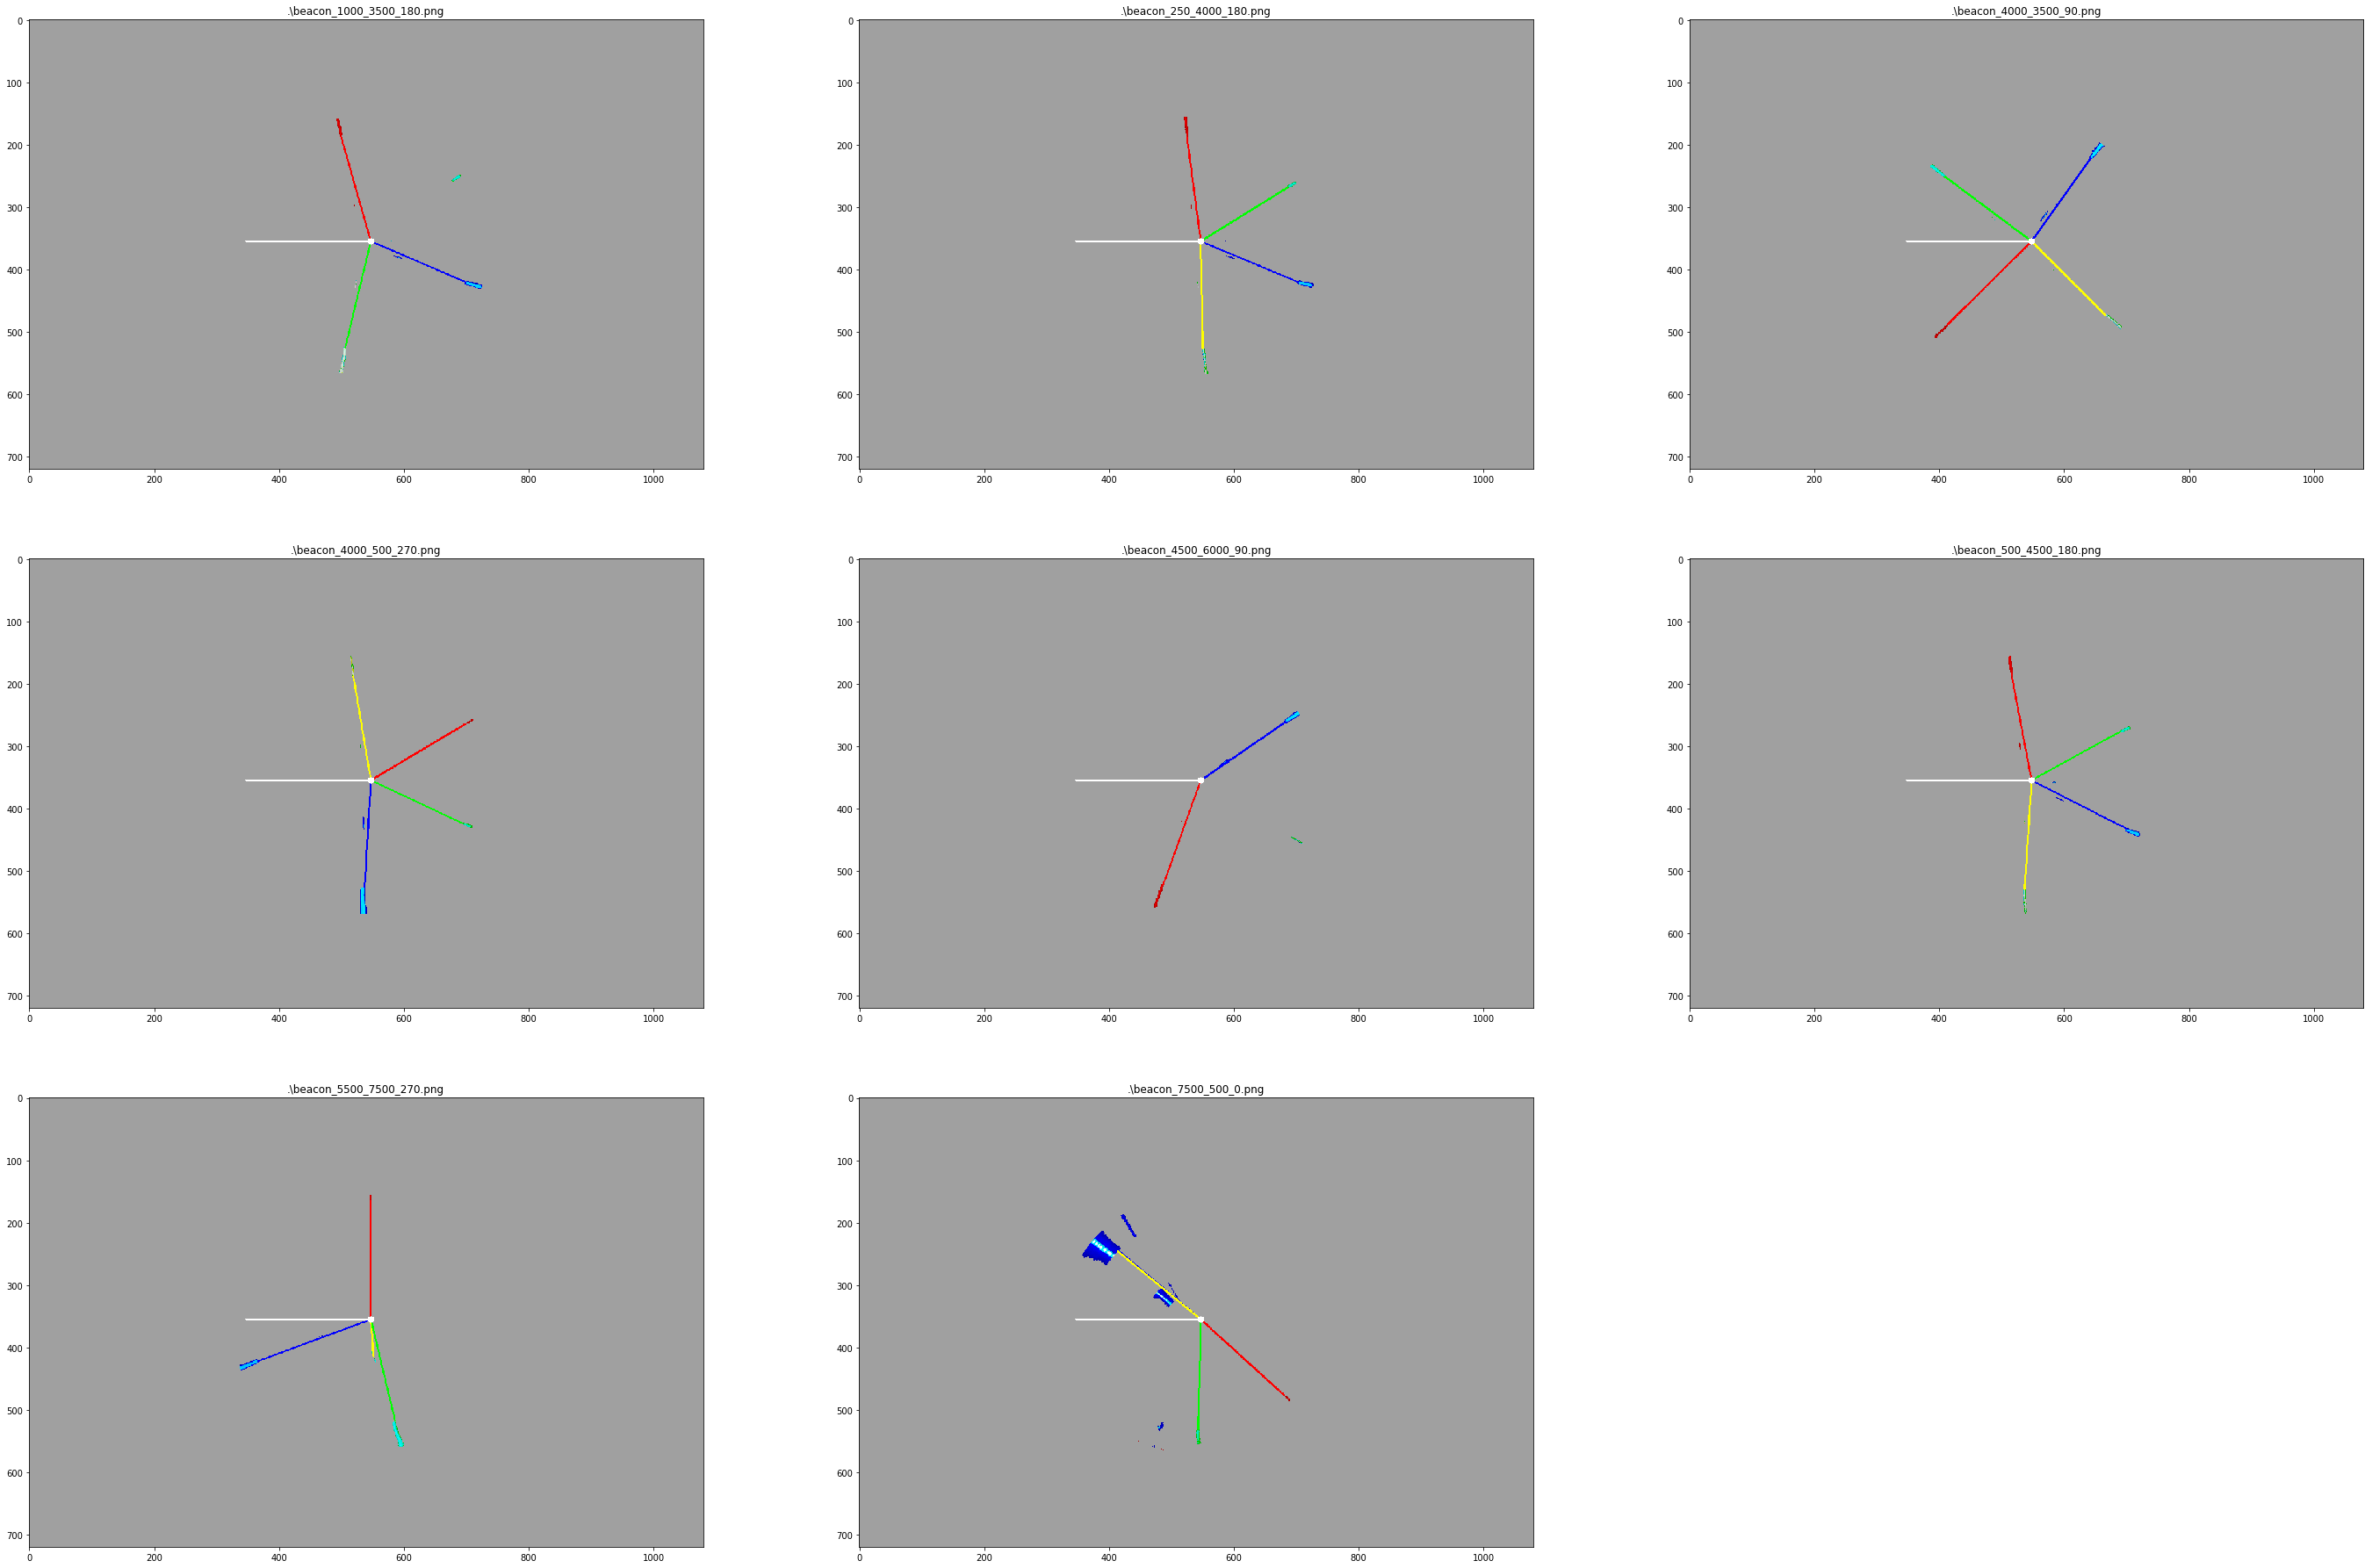

In [33]:
show_images(images_, cols = 3, titles = titles_)

# Verifying images thresholding

-- Picture:  beacon_1000_3500_180 --
-- Picture:  beacon_250_4000_180 --
-- Picture:  beacon_4000_3500_90 --
-- Picture:  beacon_4000_500_270 --
-- Picture:  beacon_4500_6000_90 --
y  not found.
g  not found.
-- Picture:  beacon_500_4500_180 --
-- Picture:  beacon_5500_7500_270 --
-- Picture:  beacon_7500_500_0 --


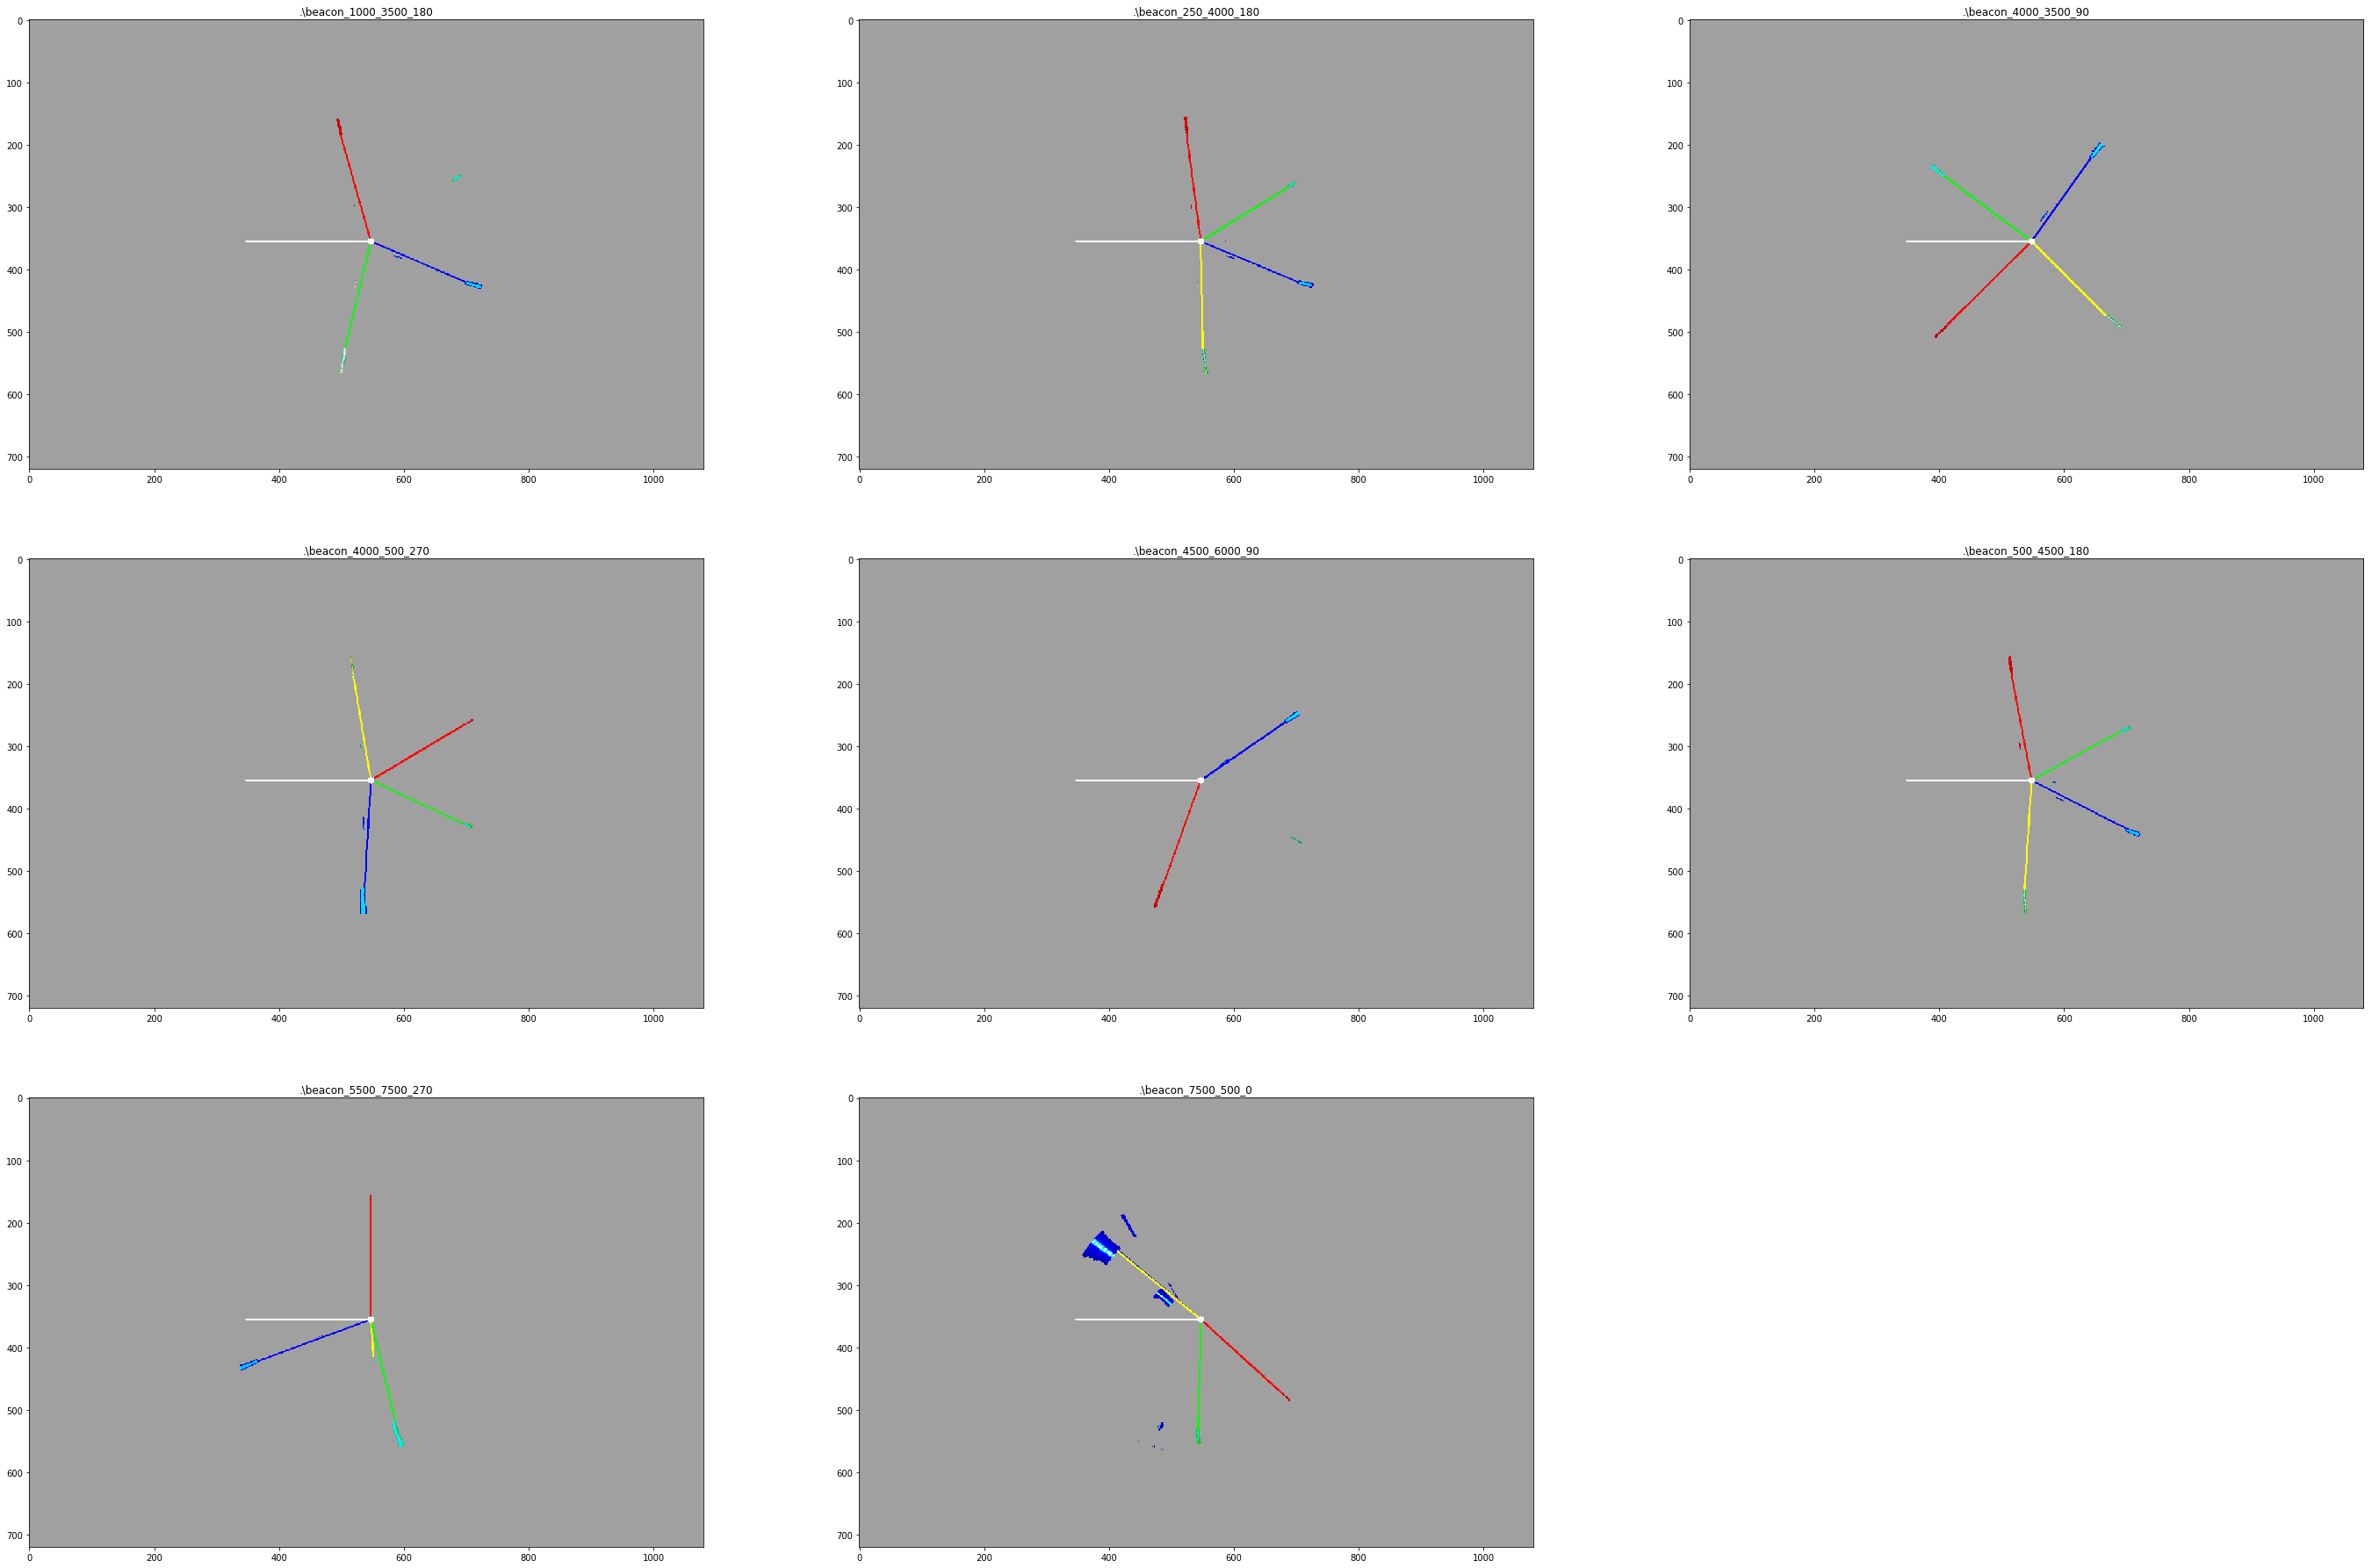

In [36]:
center_circles = (532, 357)
center_beacon = (547,355)
i = 1
images = []
titles = []
for filename in glob.glob("./images/*.png"):
    elements = re.findall('[+-]?\d+', filename)
    try: 
        x,y,a = elements[0],elements[1],elements[2]
        x,y,a = float(x),float(y),float(a)
    except:
        continue
    print("-- Picture: ", filename[2:-4], '--')
    i=i+1
    rawImage = cv2.imread(filename)    
    height,width,depth = rawImage.shape
    imgWithCircle  = np.zeros((height,width), np.uint8)
    cv2.circle(imgWithCircle,center_circles,207,(255,255,255),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,165,(0,0,0),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,75,(255,255,255),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,45,(0,0,0),thickness=-1)
    imask = imgWithCircle>0
    img = np.zeros_like(rawImage, np.uint8)
    img[imask] = rawImage[imask]

    ret,thresh_img = cv2.threshold(img,170,0,cv2.THRESH_TOZERO)
    
    thresh_img,angles,lights_coordinates = find_angles_and_get_result(thresh_img,center_beacon,boundaries)
    thresh_img[np.where((thresh_img==[0,0,0]).all(axis=2))] = [160,160,160]
    images.append(thresh_img)
    titles.append(filename[:-4])
    
show_images(images, cols = 3, titles = titles)